# Supervised Learning & Machine Learning with Sklearn

In this notebook, we will work with breast cancer data available through sklearn's open source data repository. We will use machine learning algorithms to diagnose whether someone has a benign or malignant tumor.

To do this, we will collect the data, put it in a data frame, and do some initial exploration. Second, we will explore the data, checking for missing values, and visualize the data with a correlation plot. Third, we will do any additional data clean up.  Forth, we will train/test/split the data. Fifth, we will apply machine learning for classification, using a dummy classifier.  We will then apply a logistic regression model, make predictions, run confusion matrix  scores, check for accuracy, recall & precision, change threshold values, run ROC Curves and AUC values.  Finally, we will check predictions on training data for a Decision Tree and Random Forest Classifier.


## Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

## 1. Data Collection

In [2]:
from sklearn import datasets

In [3]:
[dset for dset in dir(datasets) if 'load_' in dset]

['load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine']

**Import and load dataset**

In [4]:
bcancer = datasets.load_breast_cancer()

**Initial exploration of the breast cancer dataset**

In [5]:
bcancer.keys() # Take a look at the keys

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
bcancer['feature_names']  # Peek at the feature names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
print (bcancer['DESCR']) # Read the description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

**Convert the data into a data frame, and assign columns**

In [8]:
bcancer_df = pd.DataFrame(bcancer['data'], columns = bcancer['feature_names'])
bcancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [9]:
bcancer_df.shape

(569, 30)

**Add the target variable column to the bcancer_df data frame**

In [10]:
bcancer_df['diagnosis'] = bcancer['target']
bcancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


## 2. Data Exploration and Visualization

In [11]:
bcancer_df.shape

(569, 31)

In [12]:
bcancer_df['diagnosis'].value_counts() # check the benign (357) and malignant cases (212)

1    357
0    212
Name: diagnosis, dtype: int64

In [13]:
bcancer_df['diagnosis'] = 1 - bcancer_df['diagnosis']
bcancer_df['diagnosis'].value_counts() # check the benign (357) and malignant cases (212)

0    357
1    212
Name: diagnosis, dtype: int64

In [14]:
bcancer_df.info() # get some basic info on each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [15]:
bcancer_df.describe() # to see some statistics

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**Get a correlation Plot**

In [16]:
corm = bcancer_df.corr()
masko = np.zeros_like(corm, dtype = np.bool)
masko[np.triu_indices_from(masko)] = True

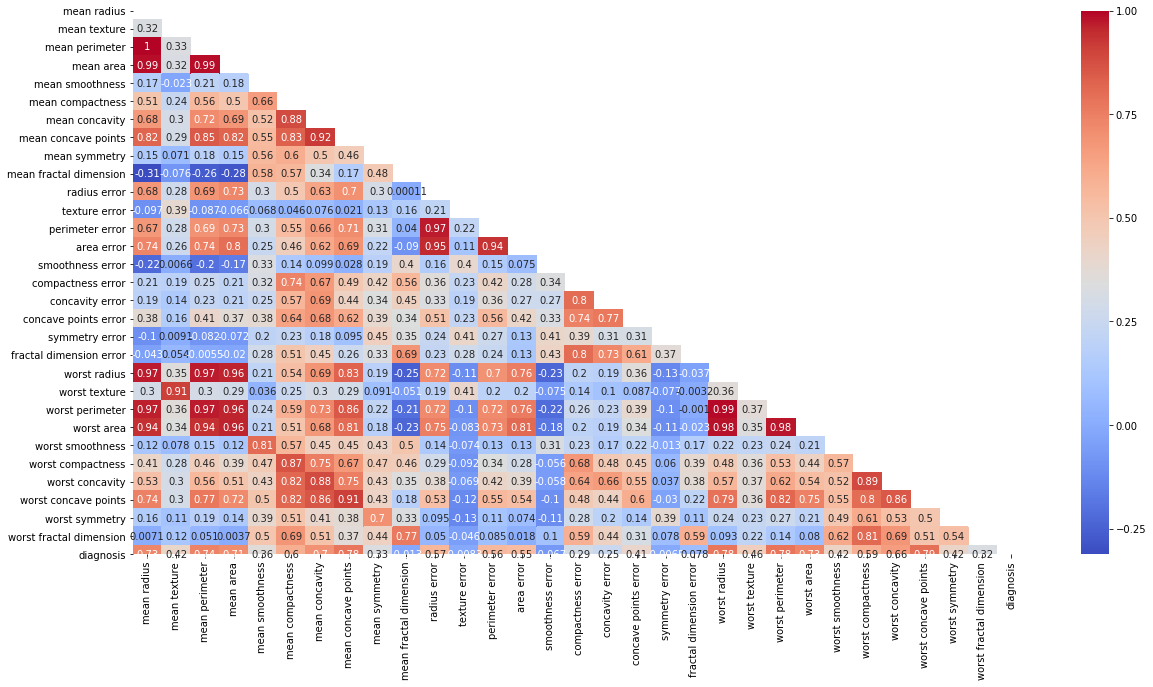

In [17]:
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(corm, mask = masko, cmap = 'coolwarm', annot=True)

In [18]:
abs(corm.loc['diagnosis',:]).sort_values()[::-1] # to see which variables are strongly correlated with diagnosis

diagnosis                  1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

## 3. Data Preparation

**Separate independent variables into a X data frame, and target variable into y series.**

In [19]:
X = bcancer_df.loc[:,bcancer_df.columns != 'diagnosis']
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
y = bcancer_df.loc[:,'diagnosis']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## 4. Train/Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

## 5. Apply Machine Learning models for Classification

### 5.0 Dummy Classifier

In [23]:
from sklearn.dummy import DummyClassifier#Random predictions. Random baseline model for classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score

dummy = DummyClassifier(strategy = 'most_frequent', random_state=0)#Shift tab to see
dummy.fit(X_train, y_train)#all will be 0's.

ydummy_train = dummy.predict(X_train)#inporting other metrics
ydummy_train[0:5] # Most frequent case is 0 (Benign)

array([0, 0, 0, 0, 0])

**Confusion matrix on dummy classifier**

In [24]:
ydummy_test = dummy.predict(X_test)#model predicats all as 0
print ('Confusion matrix for DummyClassifier is : \n \n', confusion_matrix(y_test,ydummy_test))

Confusion matrix for DummyClassifier is : 
 
 [[91  0]
 [52  0]]


**Accuracy score of dummy classifier**

In [25]:
print ('Accuracy score for DummyClassifier is : \n \n', dummy.score(X_test,y_test))#.63 is ok

Accuracy score for DummyClassifier is : 
 
 0.6363636363636364


### 5.1 Logistic Regression

**Train a logistic regression model on the training data**

In [26]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()#store in variable
logr.fit(X_train, y_train)

/Users/margaretcatherman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Predictions, Confusion matrix, & scores**

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

ypred_train = logr.predict(X_train)#.predict get 1 ,0
ypred_test = logr.predict(X_test)

print ('First 8 Predictions for training data are: ', ypred_train[:8])
print ('First 8 Predictions for test data are: ', ypred_test[:8])

First 8 Predictions for training data are:  [0 0 1 0 0 0 0 1]
First 8 Predictions for test data are:  [1 0 0 1 0 0 0 1]


In [28]:
print ('confusion matrix for training data is : \n', confusion_matrix(y_train,ypred_train), '\n', '\n')
print ('confusion_matrix for test data is : \n', confusion_matrix(y_test,ypred_test), '\n')

confusion matrix for training data is : 
 [[260   6]
 [ 11 149]] 
 

confusion_matrix for test data is : 
 [[85  6]
 [ 3 49]] 



**Accuracy, Recall & Precision**

**On Training Data**

In [29]:
print ('Accuracy for train data is : \n', accuracy_score(y_train,ypred_train), '\n')
print ('Recall for train data is : \n', recall_score(y_train,ypred_train), '\n')
print ('Precision for train data is : \n', precision_score(y_train,ypred_train), '\n')

Accuracy for train data is : 
 0.960093896713615 

Recall for train data is : 
 0.93125 

Precision for train data is : 
 0.9612903225806452 



**On Test Data**

In [30]:
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test), '\n')

Accuracy for test data is : 
 0.9370629370629371 

Recall for test data is : 
 0.9423076923076923 

Precision for test data is : 
 0.8909090909090909 



**Predicting probabilities by Changing the threshold values**

In [31]:
yprob_test = logr.predict_proba(X_test)#higher precision, choose higher threshhold
yprob_test[0:5,:] # Probabilities that the target variable is 0 (first colum), 1(second colum)

array([[8.46122328e-03, 9.91538777e-01],
       [9.99617760e-01, 3.82240117e-04],
       [9.97872486e-01, 2.12751360e-03],
       [9.92989268e-05, 9.99900701e-01],
       [9.95330645e-01, 4.66935544e-03]])

**Recalculate confusion matrix by varying the threshold**

In [32]:
confusion_matrix(y_test,ypred_test) # Confusion matrix when threshold was default value of 0.5

array([[85,  6],
       [ 3, 49]])

In [33]:
confusion_matrix(y_test,yprob_test[:,1] > 0.2) #make threshold lower, get less false neg, inc recalll
# If threshold is high, precision will be high, but recall will be low and FN will increase
# If threshold is low, recall will be high, but precision will be low, and FP will increase

array([[85,  6],
       [ 1, 51]])

**Compare scores for threshold values**

In [34]:
print ('Scores for default threshold value of: ', 0.5, '\n')
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test))

Scores for default threshold value of:  0.5 

Accuracy for test data is : 
 0.9370629370629371 

Recall for test data is : 
 0.9423076923076923 

Precision for test data is : 
 0.8909090909090909


In [35]:
print ('Scores for threshold value of: ', 0.2, '\n')
print ('Accuracy for test data is : \n', accuracy_score(y_test,yprob_test[:,1] > 0.2), '\n')
print ('Recall for test data is : \n', recall_score(y_test,yprob_test[:,1] > 0.2), '\n')
print ('Precision for test data is : \n', precision_score(y_test,yprob_test[:,1] > 0.2))

Scores for threshold value of:  0.2 

Accuracy for test data is : 
 0.951048951048951 

Recall for test data is : 
 0.9807692307692307 

Precision for test data is : 
 0.8947368421052632


**ROC Curves and AUC values**

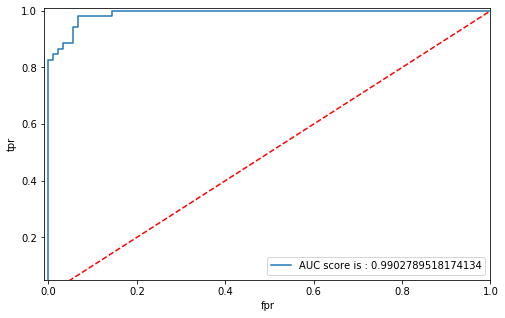

0.9902789518174134

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score, auc#BETTER WAY TO COMPARE Dif models

fpr_logr, tpr_logr,_ = roc_curve(y_test,yprob_test[:,1])#NO treshold; actual values and probabilites
auc_logr = auc(fpr_logr, tpr_logr)# will calculate the false and true positive rate variable

fig = plt.figure(figsize = (8,5))

plt.plot(fpr_logr,tpr_logr, label = 'AUC score is : ' + str(auc_logr))
plt.xlabel('fpr', fontsize = 10)
plt.ylabel('tpr', fontsize = 10)
plt.xlim([-0.01,1])
plt.ylim([0.05,1.01])
plt.legend()

plt.plot([0,1],[0,1],'r--')
plt.show()

roc_auc_score(y_test,yprob_test[:,1])#very good AUC. blue line plots for dif threshold

### 5.2 Decision Trees

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt = DecisionTreeClassifier(random_state=12, max_depth=5)
dt.fit(X_train,y_train)

ypred_train_dt = dt.predict(X_train) # Predictions on training data for DecisionTreeClassifer()
ypred_test_dt = dt.predict(X_test) # Predictions on testing data for DecisionTreeClassifer()

print ('confusion matrix for training data for default threshold  is : \n', confusion_matrix(y_train,ypred_train_dt), '\n', '\n')
print ('confusion_matrix for test data for default threshol is : \n', confusion_matrix(y_test,ypred_test_dt), '\n')

confusion matrix for training data for default threshold  is : 
 [[265   1]
 [  4 156]] 
 

confusion_matrix for test data for default threshol is : 
 [[88  3]
 [ 3 49]] 



**Scores on test data for decision Trees**

In [39]:
yprob_test_dt = dt.predict_proba(X_test) # probability predictions based on DecisionTree Classifier

print ('Scores for default threshold of: ', 0.5, '\n')
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_dt), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test_dt), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test_dt), '\n')
print ('AUC score for test data is : \n', roc_auc_score(y_test,yprob_test_dt[:,1]))#most important

Scores for default threshold of:  0.5 

Accuracy for test data is : 
 0.958041958041958 

Recall for test data is : 
 0.9423076923076923 

Precision for test data is : 
 0.9423076923076923 

AUC score for test data is : 
 0.9802409129332206


### 5.3 RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

ypred_train_rf = rf.predict(X_train) # Predictions on training data for RandomForest
ypred_test_rf = rf.predict(X_test) # Predictions on training data for RandomForest

print ('confusion matrix for training data for default threshold is : \n', confusion_matrix(y_train,ypred_train_rf), '\n', '\n')
print ('confusion_matrix for test data for default threshold is : \n', confusion_matrix(y_test,ypred_test_rf), '\n')

confusion matrix for training data for default threshold is : 
 [[266   0]
 [  0 160]] 
 

confusion_matrix for test data for default threshold is : 
 [[88  3]
 [ 4 48]] 



/Users/margaretcatherman/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Scores on test data for RandomForest**

In [42]:
yprob_test_rf = rf.predict_proba(X_test) # probability predictions based on RandomForest

print ('Scores for default threshold value of: ', 0.5, '\n')
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test_rf), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test_rf), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test_rf), '\n')
print ('AUC score for test data is : \n', roc_auc_score(y_test,yprob_test_rf[:,1]))

Scores for default threshold value of:  0.5 

Accuracy for test data is : 
 0.951048951048951 

Recall for test data is : 
 0.9230769230769231 

Precision for test data is : 
 0.9411764705882353 

AUC score for test data is : 
 0.9923922231614539
